# Groceries : Cohort Analysis

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import datetime as dt

In [2]:
filePath = 'Groceries_dataset.csv'

In [3]:
df = pd.read_csv(filePath)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [4]:
# Item Description

df.itemDescription.value_counts()

whole milk               2502
other vegetables         1898
rolls/buns               1716
soda                     1514
yogurt                   1334
                         ... 
make up remover             5
bags                        4
baby cosmetics              3
kitchen utensil             1
preservation products       1
Name: itemDescription, Length: 167, dtype: int64

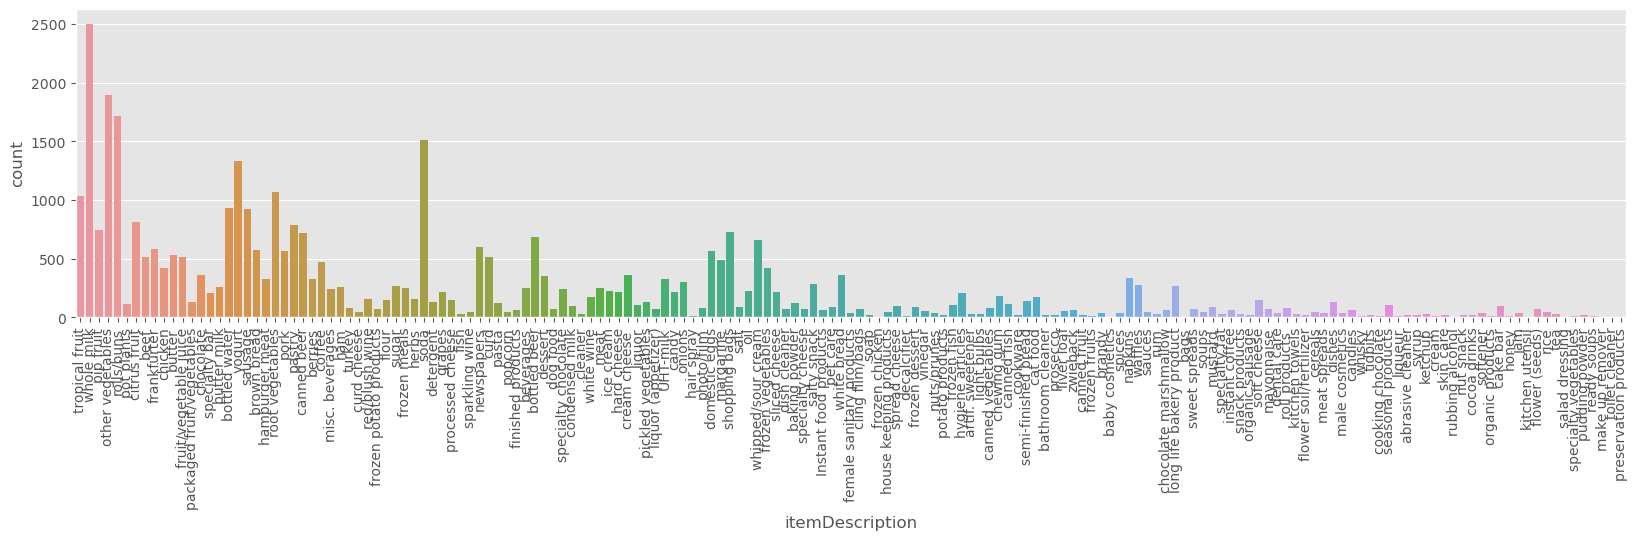

In [5]:
plt.figure(figsize =(20,4))
sns.countplot(data=df,x=df.itemDescription)
plt.xticks(rotation=90)
plt.show()

In [6]:
from wordcloud import WordCloud

In [7]:
all_descriptions =' '.join(df['itemDescription'])
new_str =''
for item in list(set((all_descriptions).split(' '))):
    new_str += f'{item} '
    
new_str

'white citrus frozen herbs  candy care bakery berries coffee photo/film curd dressing turkey preservation baking cling frankfurter marshmallow grapes semi-finished detergent sugar UHT-milk cosmetics long soft film/bags pip chicken sauces instant male seasonal sausage hard products female dish plants whisky fruit/vegetables specialty oil finished utensil snack soups tidbits dessert napkins cocoa fruit hygiene bulbs ready soap Instant cooking life spreads jam rum canned cheese pasta house onions waffles liquor roll flour dog tropical condensed whipped/sour vegetables meat hamburger mayonnaise ham sparkling syrup water soda processed salty dental skin towels toilet milk eggs bathroom spices gum newspapers chewing candles nut juice vinegar cleaner pastry product cake spread organic light root honey other bags shopping bread cream keeping prosecco packaged bottled pudding potato mustard articles cookware decalcifier sanitary brandy ketchup whole salt pot loaf sliced powder fat kitchen wine 

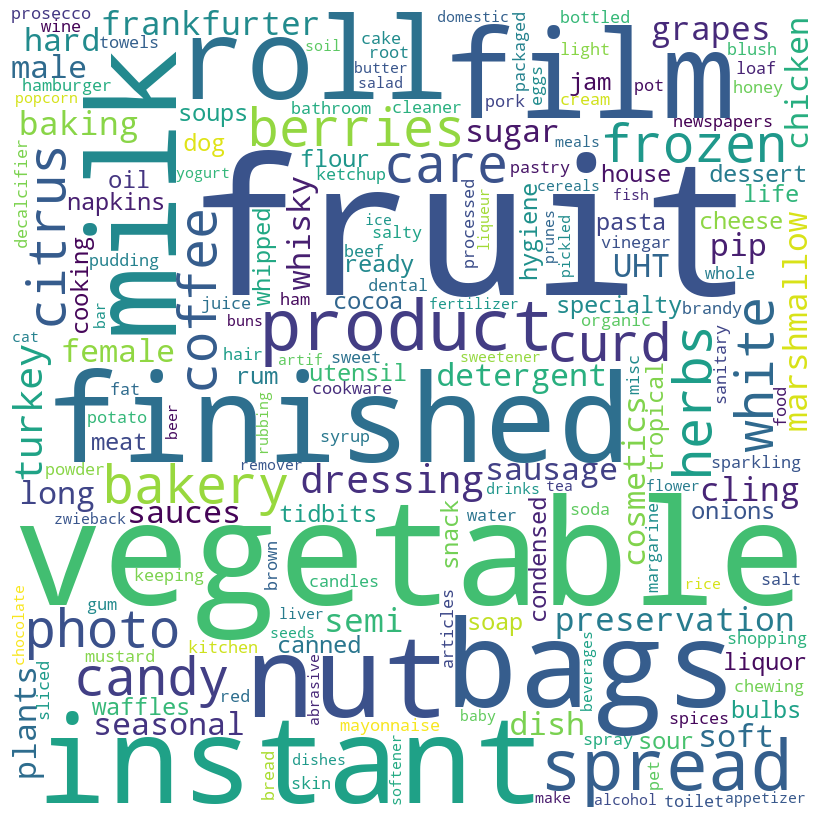

In [8]:
wc = WordCloud(width=800, height=800, background_color='white').generate(new_str)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

In [9]:
def getCategory(item):
    # if any(i in item for i in ['milk','butter']):
    #     return 'Milk Product'
    if any(i in item for i in ['fruit','berries','grapes']):
        return 'Fruits'
    elif any(i in item for i in ['juice']):
        return 'Juices'
    elif any(i in item for i in ['frozen']):
        return 'Frozen Foods'
    elif any(i in item for i in ['beef','meat','ham','sausage','frankfurter','chicken','pork','turkey','fish','liver']):
        return 'Meat Products'
    elif any(i in item for i in ['soda','coffee','wine','water','beverages','bottled','prosecco','whisky','tea','rum','liqueur','brandy','drink','syrup','liquor']):
        return 'Drinks'
    elif any(i in item for i in ['cheese','yogurt','milk','butter','eggs']):
        return 'Dairy Product'
    elif any(i in item for i in ['candy','cream','waffles','appetizer','cake','pastry','chocolate','snack','dessert']):
        return 'Snack'
    elif any(i in item for i in ['vegetables','potato','buns']):
        return 'Veggies'
    elif any(i in item for i in ['vinegar','sugar','onions','sauce','sweetener','spices','ketchup','salt','sweet spreads']):
        return 'Seasoning'
    elif any(i in item for i in ['zwieback','bread','bakery']):
        return 'Bakery Product'
    elif any(i in item for i in ['detergent','soap','decalcifier','hygiene','cleaner','softener']):
        return 'Soap'
    elif any(i in item for i in ['cat','dog','pet']):
        return 'Pet Products'
    elif any(i in item for i in ['cosmetics','female','male','skin','dental','make up','hair']):
        return 'Cosmetics'
    elif any(i in item for i in ['fertilizer','seeds']):
        return 'Gardens Product'
    elif any(i in item for i in ['herbs','flour','powder','margarine']):
        return 'Cooking Powder'
    elif any(i in item for i in ['instant','pasta','popcorn','soups','dishes','jam','honey','rice','']):
        return 'Food'
    else:
        return item

In [10]:
df2 = df.copy()

df2['Cat'] = df2['itemDescription'].apply(lambda x: getCategory(x)) 

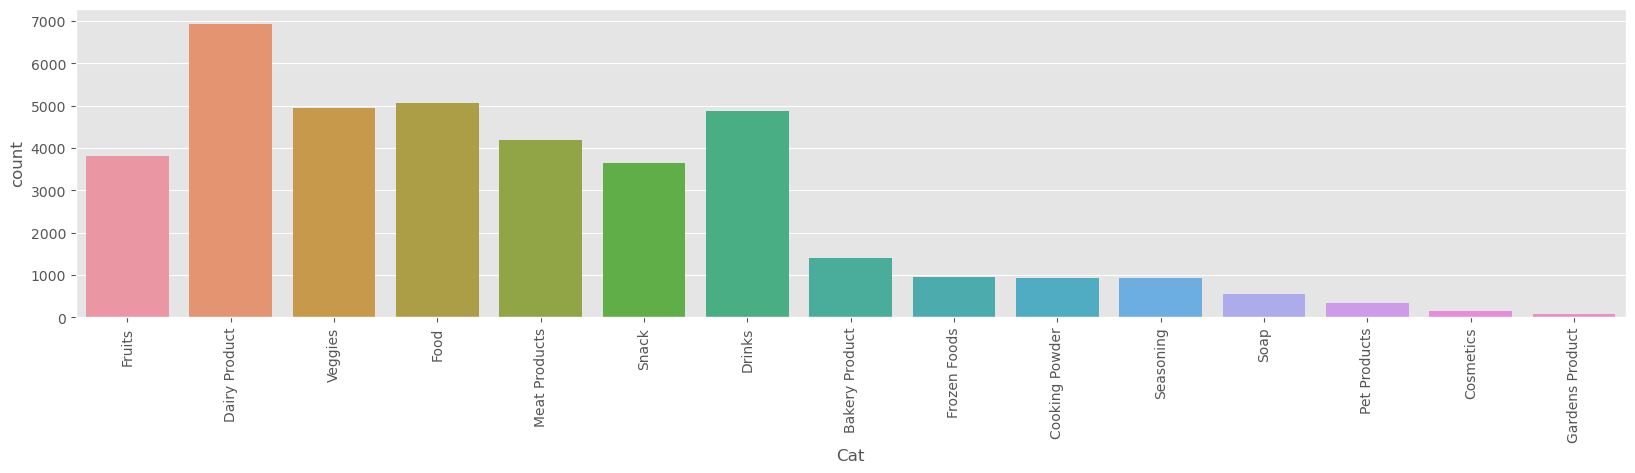

In [11]:
plt.figure(figsize =(20,4))
sns.countplot(data=df2,x=df2.Cat)
plt.xticks(rotation=90)
plt.show()

Its better :)

In [42]:
# change Date column type to Datetime

df2.Date = pd.to_datetime(df2.Date)

After changing date column type. we can look out for Cohorts

In [43]:
#Take the Retention Analysis

df2['month'] = df2['Date'].apply(lambda x: dt.date(x.year, x.month,1))

df2['initial_month'] = df2.groupby('Member_number')['month'].transform('min')

df2.loc[df2['month'] != df2['initial_month']].head()

,Member_number,Date,itemDescription,Cat,month,initial_month
0,1808,2015-07-21,tropical fruit,Fruits,2015-07-01,2014-11-01
1,2552,2015-05-01,whole milk,Dairy Product,2015-05-01,2014-02-01
2,2300,2015-09-19,pip fruit,Fruits,2015-09-01,2014-03-01
3,1187,2015-12-12,other vegetables,Veggies,2015-12-01,2014-08-01
5,4941,2015-02-14,rolls/buns,Veggies,2015-02-01,2014-02-01


In [44]:
def diff_month(x):

    d1 = x['month']

    d2 = x["initial_month"]

    return ((d1.year - d2.year) * 12 + d1.month - d2.month)+1


df2['cohort_idx'] = df2.apply(lambda x: diff_month(x), axis=1)

df2.head()

,Member_number,Date,itemDescription,Cat,month,initial_month,cohort_idx
0,1808,2015-07-21,tropical fruit,Fruits,2015-07-01,2014-11-01,9
1,2552,2015-05-01,whole milk,Dairy Product,2015-05-01,2014-02-01,16
2,2300,2015-09-19,pip fruit,Fruits,2015-09-01,2014-03-01,19
3,1187,2015-12-12,other vegetables,Veggies,2015-12-01,2014-08-01,17
4,3037,2015-01-02,whole milk,Dairy Product,2015-01-01,2015-01-01,1


In [15]:
def get_cohort_matrix(data, var='Member_number', func=pd.Series.nunique):

    cd = data.groupby(['initial_month', 'cohort_idx'])[var].apply(func).reset_index()

    cc = cd.pivot_table(index = 'initial_month',

                        columns = 'cohort_idx',

                        values = var)

    cs = cc.iloc[:,0]

    retention = cc.divide(cs, axis = 0)

    retention = retention.round(3) * 100

    return cc, retention

In [45]:
cc, retention = get_cohort_matrix(df2)

cc

cohort_idx,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
initial_month,,,,,,,,,,,,,,,,,,,,,
2014-01-01,605.0,98.0,87.0,87.0,108.0,102.0,103.0,74.0,74.0,102.0,...,81.0,86.0,82.0,90.0,78.0,84.0,67.0,93.0,84.0,73.0
2014-02-01,522.0,81.0,76.0,91.0,74.0,78.0,84.0,73.0,83.0,92.0,...,70.0,76.0,76.0,68.0,76.0,70.0,74.0,66.0,62.0,NaN
2014-03-01,440.0,62.0,79.0,64.0,70.0,68.0,58.0,88.0,69.0,55.0,...,52.0,59.0,59.0,75.0,63.0,57.0,68.0,54.0,NaN,NaN
2014-04-01,383.0,53.0,57.0,66.0,58.0,55.0,70.0,59.0,66.0,58.0,...,48.0,41.0,60.0,46.0,58.0,63.0,46.0,NaN,NaN,NaN
2014-05-01,319.0,39.0,49.0,57.0,57.0,53.0,42.0,56.0,40.0,30.0,...,41.0,54.0,42.0,31.0,45.0,46.0,NaN,NaN,NaN,NaN
2014-06-01,262.0,45.0,50.0,39.0,46.0,32.0,35.0,46.0,36.0,37.0,...,40.0,35.0,30.0,33.0,35.0,NaN,NaN,NaN,NaN,NaN
2014-07-01,225.0,28.0,27.0,26.0,34.0,36.0,39.0,28.0,28.0,34.0,...,20.0,29.0,32.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2014-08-01,202.0,26.0,32.0,23.0,29.0,32.0,17.0,31.0,30.0,27.0,...,24.0,27.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-01,147.0,22.0,23.0,24.0,25.0,26.0,24.0,20.0,24.0,24.0,...,22.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\intel\AppData\Local\Temp\ipykernel_8136\1265586494.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cc[:-1][2] = cc[:-1][2].apply(lambda x: 0 if np.isnan(x) else x )


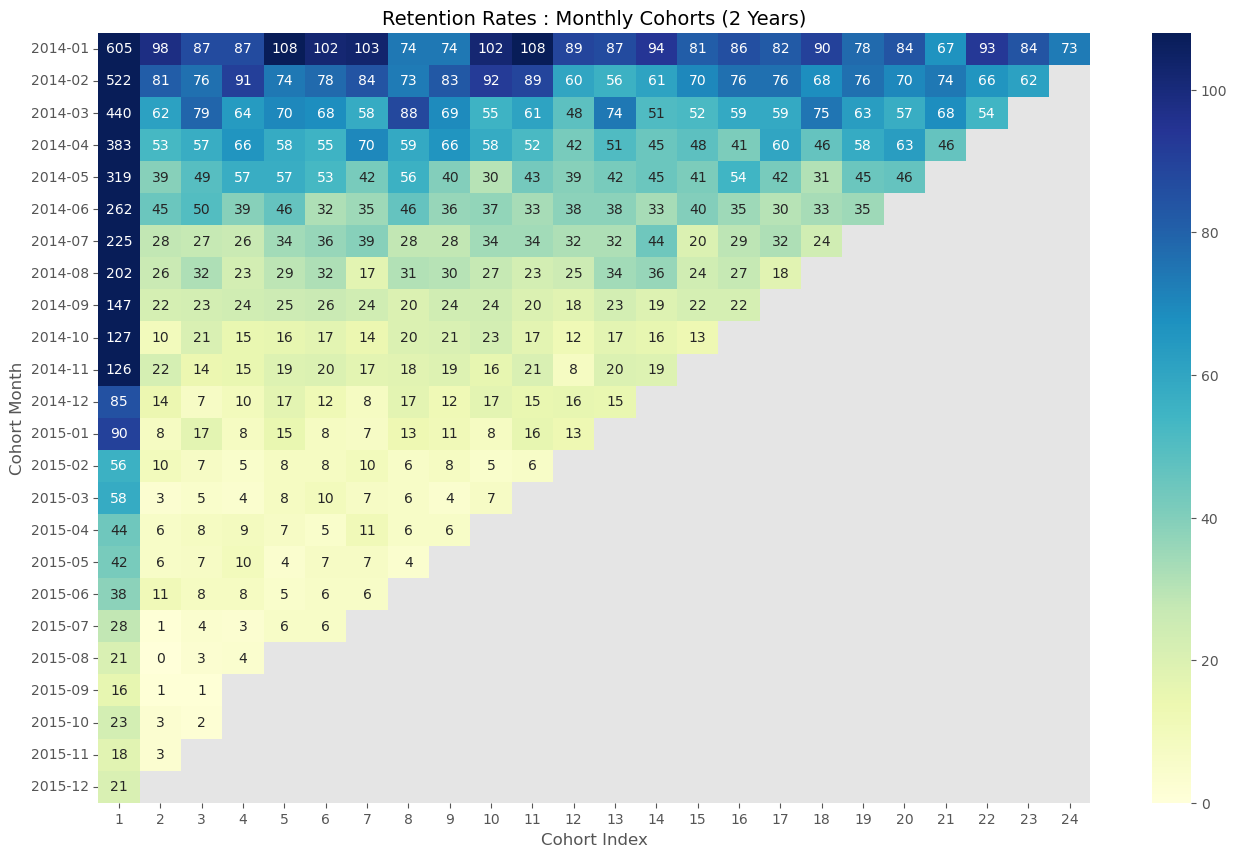

In [46]:
cc.index=cc.index.strftime('%Y-%m')

cc[:-1][2] = cc[:-1][2].apply(lambda x: 0 if np.isnan(x) else x )

plt.figure(figsize=(16, 10))
# Adding a title
plt.title('Retention Rates : Monthly Cohorts (2 Years)', fontsize = 14)
# Creating the heatmap
sns.heatmap(cc, annot = True,vmin = 0.0,vmax=108,cmap="YlGnBu", fmt='g')
plt.ylabel('Cohort Month')
plt.xlabel('Cohort Index')
plt.yticks( rotation='360')
plt.show()

In [30]:
def count_LostCustomers(index):
    losts = list((cc[:-index][1]- cc[:-index][2]).values)
    losts.extend(list(cc[-index:][1].values))
    
    return losts
    # print(losts)

In [36]:
def churns(day):
    '''
        Initial Day / Day 1 = 0
        Day 2 = 1
    '''
    if day == 0:
        print("Initial Day")
        return
    
    avg = []
    lost_customers = count_LostCustomers(day)
    
    for i,idx in enumerate(cc.index):
        
        if i == len(cc.index)-day:
            break
        
        
        print(f'Churn Rate at {idx} Day {day+1} : ',end='')
        churns = ((lost_customers[i] / list(cc[i:i+1][1].values))*100)[0].round(2)
        avg.append(churns)
        print(churns) 
        
    print(f'\nAverage Churn Rate on Day {day+1} : {(sum(avg)/len(avg)).round(2)}')

In [37]:
churns(int(input('Count Churn Rate on initial Day +')))

Churn Rate at 2014-01 Day 7 : 83.8
Churn Rate at 2014-02 Day 7 : 84.48
Churn Rate at 2014-03 Day 7 : 85.91
Churn Rate at 2014-04 Day 7 : 86.16
Churn Rate at 2014-05 Day 7 : 87.77
Churn Rate at 2014-06 Day 7 : 82.82
Churn Rate at 2014-07 Day 7 : 87.56
Churn Rate at 2014-08 Day 7 : 87.13
Churn Rate at 2014-09 Day 7 : 85.03
Churn Rate at 2014-10 Day 7 : 92.13
Churn Rate at 2014-11 Day 7 : 82.54
Churn Rate at 2014-12 Day 7 : 83.53
Churn Rate at 2015-01 Day 7 : 91.11
Churn Rate at 2015-02 Day 7 : 82.14
Churn Rate at 2015-03 Day 7 : 94.83
Churn Rate at 2015-04 Day 7 : 86.36
Churn Rate at 2015-05 Day 7 : 85.71
Churn Rate at 2015-06 Day 7 : 71.05

Average Churn Rate on Day 7 : 85.56


In [50]:
df2.head()

,Member_number,Date,itemDescription,Cat,month,initial_month,cohort_idx
0,1808,2015-07-21,tropical fruit,Fruits,2015-07-01,2014-11-01,9
1,2552,2015-05-01,whole milk,Dairy Product,2015-05-01,2014-02-01,16
2,2300,2015-09-19,pip fruit,Fruits,2015-09-01,2014-03-01,19
3,1187,2015-12-12,other vegetables,Veggies,2015-12-01,2014-08-01,17
4,3037,2015-01-02,whole milk,Dairy Product,2015-01-01,2015-01-01,1


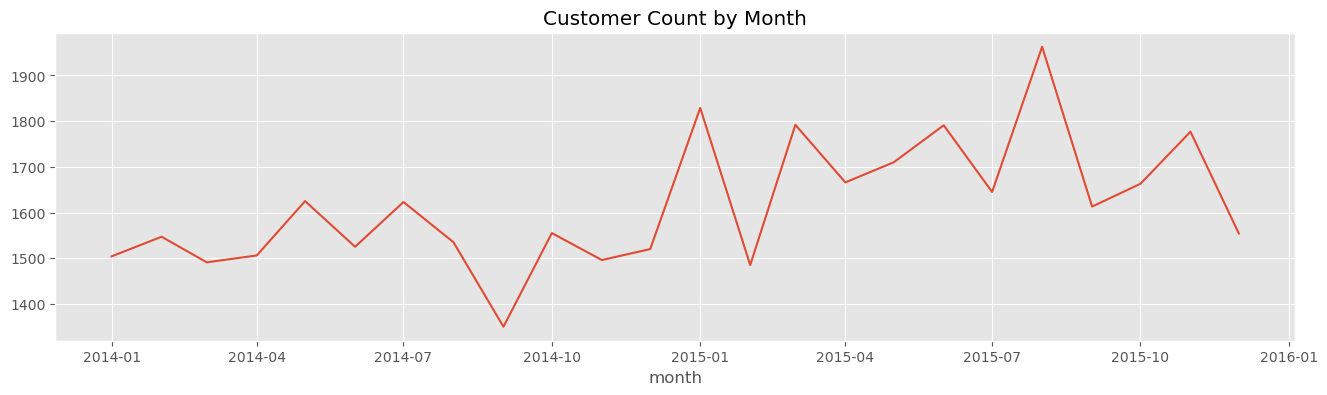

In [55]:
plt.figure(figsize=(16,4))
df2.groupby('month')['Member_number'].count().plot()
plt.title('Customer Count by Month')
plt.show()